### **Import Library**

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

**Penjelasan**

Kode di atas digunakan untuk mengimpor library yang diperlukan dalam proses analisis data dan pembuatan model regresi.

* **pandas & numpy** mengolah dan membersihkan data.

* **matplotlib & seaborn** membuat grafik dan visualisasi data.

* **scikit-learn (train_test_split, LinearRegression, metrics)** membangun model regresi linear dan mengevaluasi hasil prediksi.

* **statsmodels** memberikan analisis regresi yang lebih detail dan lengkap secara statistik.


### **Load data dari GitHub**

In [ ]:
url = "https://raw.githubusercontent.com/Evameivina/tugas3_dataforecasting/refs/heads/main/forecasting_dataset.csv"
df = pd.read_csv(url)

print("=== Data Preview ===")
print(df.head(), "\n")
print("=== Info Data ===")
print(df.info(), "\n")
print("=== Missing Values ===")
print(df.isnull().sum())

=== Data Preview ===
         Date  Irradiance (kWh/m²)  Temperature (°C)  Humidity (%)  \
0  2023-01-01             5.745071         27.169259     63.577874   
1  2023-01-02             4.792604         29.158709     65.607845   
2  2023-01-03             5.971533         29.314571     70.830512   
3  2023-01-04             7.284545         28.395445     70.538021   
4  2023-01-05             4.648770         29.677429     46.223306   

   Solar Output (MWh)  
0            0.983215  
1            0.846485  
2            1.343765  
3            1.578983  
4            0.925574   

=== Info Data ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 100 non-null    object 
 1   Irradiance (kWh/m²)  100 non-null    float64
 2   Temperature (°C)     100 non-null    float64
 3   Humidity (%)         100 non-null   

**Penjelasan**

Kode diatas digunakan untuk

* Mengambil dataset dari URL GitHub dan membacanya dengan *pandas.read_csv*

* Menampilkan preview data menggunakan *df.head()* untuk melihat 5 baris pertama.

* Menampilkan informasi struktur data *(df.info())* seperti jumlah baris, kolom, tipe data, dan jumlah nilai yang tidak kosong.

* Mengecek missing values *(df.isnull().sum())* untuk mengetahui apakah ada nilai kosong di setiap kolom.

**Output**
* Dataset memiliki 100 baris dan 5 kolom dengan 4 kolom numerik *(float64)* dan 1 kolom tanggal *(object)*
* Tidak ada nilai kosong pada seluruh kolom.
* Data awal menunjukkan nilai irradiance, temperatur, kelembapan, dan output listrik untuk beberapa hari di awal Januari 2023.


### **Data Cleaning & Wrangling**

In [ ]:
# Hapus duplikat
df.drop_duplicates(inplace=True)

**Penjelasan**

Menghapus baris yang sama persis di dataset untuk memastikan setiap baris adalah data unik.

In [ ]:
# Konversi kolom tanggal
for col in df.columns:
    if 'date' in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')

**Penjelasan**

Mendeteksi kolom yang mengandung kata "date" lalu mengubahnya menjadi format tanggal (datetime). Jika ada nilai yang tidak bisa dikonversi, akan diisi dengan NaT (Not a Time).

In [ ]:
# Imputasi missing values numerik
for col in df.select_dtypes(include=np.number).columns:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

**Penjelasan**

Untuk kolom numerik yang memiliki missing values, nilai kosongnya diganti dengan nilai median dari kolom tersebut agar distribusi data tidak terlalu terpengaruh.

In [ ]:
# Imputasi missing values kategorikal
for col in df.select_dtypes(exclude=np.number).columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

**Penjelasan**

Untuk kolom non-numerik (misalnya teks atau kategori), nilai yang kosong diisi dengan nilai yang paling sering muncul (mode) pada kolom tersebut.

In [ ]:
# Feature engineering dari kolom tanggal
date_cols = df.select_dtypes(include='datetime64[ns]').columns
for col in date_cols:
    df[col + "_year"] = df[col].dt.year
    df[col + "_month"] = df[col].dt.month
    df[col + "_day"] = df[col].dt.day
    df[col + "_weekday"] = df[col].dt.weekday

**Penjelasan**

Kode diatas untuk mengambil kolom bertipe tanggal lalu memecahnya menjadi empat kolom baru (tahun, bulan, hari, dan hari dalam minggu) supaya informasi waktu lebih detail dan dapat dimanfaatkan dalam analisis

In [ ]:
print("=== Data setelah cleaning & feature engineering ===")
print(df.head())

=== Data setelah cleaning & feature engineering ===
        Date  Irradiance (kWh/m²)  Temperature (°C)  Humidity (%)  \
0 2023-01-01             5.745071         27.169259     63.577874   
1 2023-01-02             4.792604         29.158709     65.607845   
2 2023-01-03             5.971533         29.314571     70.830512   
3 2023-01-04             7.284545         28.395445     70.538021   
4 2023-01-05             4.648770         29.677429     46.223306   

   Solar Output (MWh)  Date_year  Date_month  Date_day  Date_weekday  
0            0.983215       2023           1         1             6  
1            0.846485       2023           1         2             0  
2            1.343765       2023           1         3             1  
3            1.578983       2023           1         4             2  
4            0.925574       2023           1         5             3  


**Penjelasan**

*print(df.head())* menampilkan 5 baris pertama dari dataset df setelah proses cleaning dan feature engineering.


**Output**

Output dari kode print(df.head()) menampilkan lima baris pertama dari dataset setelah melalui proses pembersihan data dan pembuatan fitur tambahan (feature engineering).

* Dataset awal yang terdiri dari kolom Date, Irradiance (kWh/m²), Temperature (°C), Humidity (%), dan Solar Output (MWh) kini telah ditambahkan empat kolom baru yang dipecah dari tanggal, yaitu Date_year, Date_month, Date_day, dan Date_weekday.

* Penambahan kolom ini bertujuan untuk memudahkan analisis tren berdasarkan waktu, seperti pola bulanan atau harian, serta mempersiapkan data untuk pemodelan prediksi.

Dari output yang ditampilkan, terlihat bahwa data numerik konsisten dan kolom baru berhasil mengekstrak informasi tanggal dengan benar.




### **EDA - Visualisasi**

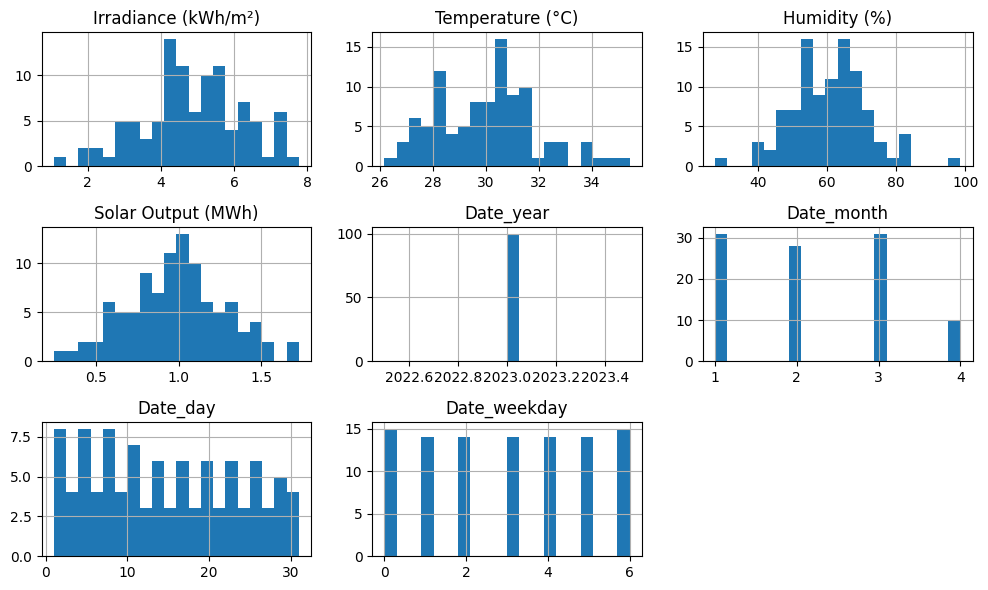

In [ ]:
# Histogram semua fitur numerik
df.select_dtypes(include=np.number).hist(figsize=(10, 6), bins=20)
plt.tight_layout()
plt.show()

**Penjelasan**

Kode diatas membuat histogram untuk semua kolom numerik dalam dataset, menampilkan distribusi nilai tiap fitur secara visual agar mudah melihat pola, sebaran, dan potensi outlier.

**Output**

Berdasarkan analisis visual dari histogram semua fitur numerik, dapat terlihat pola dan karakteristik penting dari data. Distribusi radiasi matahari (Irradiance) dan energi yang dihasilkan (Solar Output) menunjukkan bahwa sebagian besar nilai berkumpul pada kisaran menengah, menandakan produksi energi surya relatif stabil pada hari-hari dengan cuaca normal. Suhu udara cenderung terkonsentrasi pada nilai sedang hingga tinggi, yang sesuai dengan kondisi iklim sebagian besar hari pengukuran.

Kelembaban udara memiliki distribusi yang lebih luas dengan beberapa nilai ekstrem, mengindikasikan adanya hari-hari dengan kelembaban sangat tinggi atau sangat rendah, yang dapat memengaruhi produksi energi secara negatif. Fitur tanggal yang diubah menjadi angka, seperti hari dalam minggu dan bulan, juga memperlihatkan variasi yang memungkinkan identifikasi tren musiman atau pola harian dalam produksi energi. Secara keseluruhan, histogram ini memberikan gambaran menyeluruh tentang sebaran data dan memudahkan pengenalan outlier, serta mendukung pemahaman hubungan antara kondisi cuaca dan output energi surya sebelum dilakukan analisis lebih lanjut.

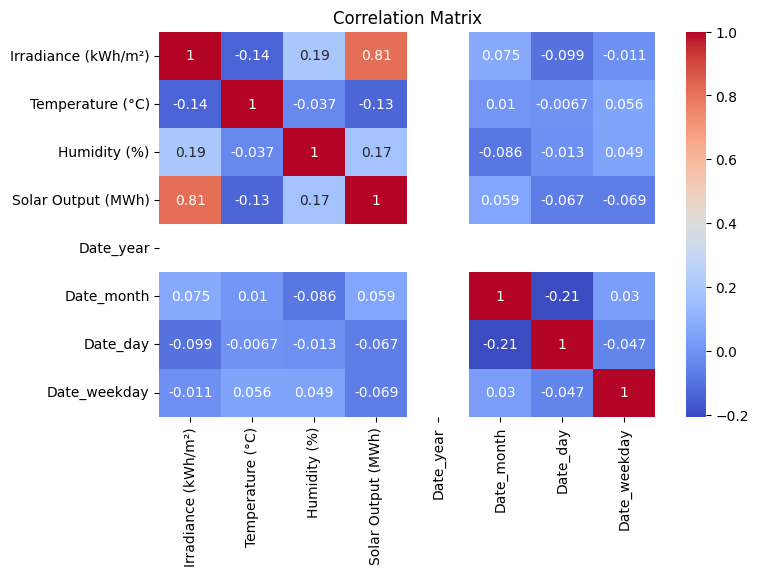

In [ ]:
# Korelasi heatmap
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(8, 5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

**Penjelasan**

Kode diatas menampilkan heatmap korelasi antar fitur numerik, memperlihatkan hubungan positif, negatif, atau lemah antar variabel, seperti korelasi kuat antara radiasi matahari dan output energi.

**Output**

Faktor utama yang memengaruhi output energi surya adalah irradiance, dengan korelasi sebesar 0,81, menunjukkan hubungan positif yang kuat; semakin tinggi radiasi matahari, semakin besar produksi energi dari panel surya.

Sementara itu, temperatur memiliki korelasi negatif yang sangat lemah terhadap output solar (-0,13), menunjukkan bahwa suhu tidak terlalu berpengaruh secara langsung.

Kelembapan menunjukkan korelasi positif namun juga lemah (0,17), sehingga pengaruhnya terhadap produksi energi relatif kecil.

Faktor tanggal, seperti tahun, bulan, hari, dan hari dalam minggu, memiliki korelasi yang sangat rendah dengan output solar (antara -0,069 hingga 0,059), menandakan bahwa aspek waktu ini hampir tidak memengaruhi produksi energi secara linear.

Korelasi antar fitur waktu juga umumnya lemah, dengan nilai tertinggi Date_month vs Date_day sebesar -0,21, sehingga fitur-fitur waktu ini relatif independen.

Sehingga, irradiance menjadi faktor dominan, sedangkan temperatur, kelembapan, dan fitur tanggal memiliki pengaruh yang sangat kecil atau hampir tidak ada terhadap output energi surya.

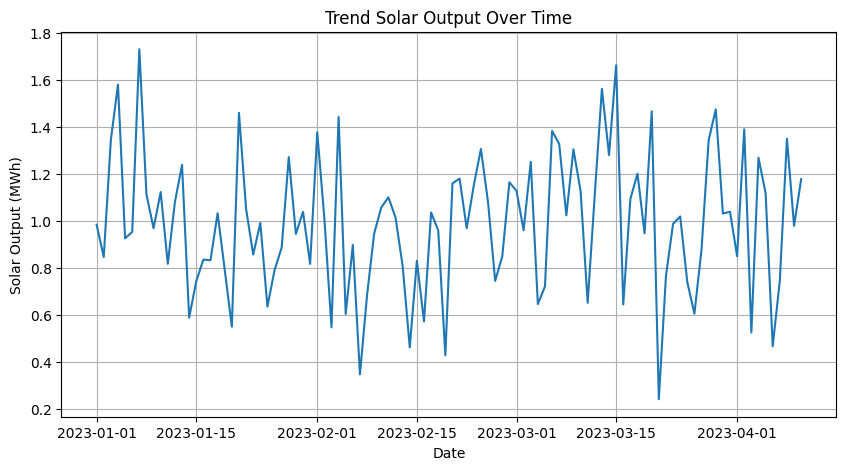

In [ ]:
# Tren Solar Output per waktu
if 'Date' in df.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['Solar Output (MWh)'])
    plt.xlabel("Date")
    plt.ylabel("Solar Output (MWh)")
    plt.title("Trend Solar Output Over Time")
    plt.grid(True)
    plt.show()

**Penjelasan**

Membuat grafik garis untuk menampilkan tren Solar Output dari waktu ke waktu, sehingga terlihat pola perubahan produksi energi surya sepanjang periode yang tersedia.

**Output**

Grafik ini menggambarkan fluktuasi produksi energi listrik (MWh) dari pembangkit surya antara 1 Januari hingga 1 April 2023.

Pada awal Januari, produksi cenderung rendah karena puncak musim hujan, di mana langit sering berawan dan intensitas matahari minim. Memasuki pertengahan Januari hingga Februari, produksi meningkat seiring lebih banyak hari cerah, namun tren ini tidak stabil—akhir Februari hingga Maret terjadi penurunan akibat cuaca berawan atau hujan.

Secara keseluruhan, tren produksi menunjukkan peningkatan menuju April, seiring peralihan ke musim kemarau dengan hari-hari cerah lebih dominan.

**Kesimpulannya** produksi energi surya sangat tidak konsisten dan sangat bergantung pada kondisi cuaca harian. Hal ini menekankan perlunya sistem penyimpanan energi atau sumber cadangan untuk menghadapi hari-hari dengan produksi rendah, serta pentingnya prediksi cuaca yang akurat untuk perencanaan dan pengelolaan pasokan energi surya secara efektif.



### **Analisis Regresi**

In [ ]:
# Target & features
target = 'Solar Output (MWh)'
features = [col for col in numeric_cols if col != target]

X = df[features]
y = df[target]

**Penjelasan**

Memisahkan dataset menjadi fitur (X) berisi kolom numerik selain target, dan target (y) berisi Solar Output (MWh), agar model dapat mempelajari hubungan antara kondisi lingkungan dan produksi energi surya.


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Penjelasan**

Membagi dataset menjadi data pelatihan dan data pengujian. Sekitar 80% data digunakan untuk melatih model (X_train, y_train) dan 20% sisanya untuk menguji performa model (X_test, y_test). Parameter random_state=42 memastikan pembagian data konsisten setiap kali kode dijalankan.

In [ ]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Penjelasan**

Melatih model regresi linear menggunakan data pelatihan, sehingga model mempelajari hubungan antara fitur dan Solar Output (MWh). Output LinearRegression() menunjukkan model sudah siap digunakan untuk prediksi.


In [ ]:
# Prediksi
y_pred = model.predict(X_test)

**Penjelasan**

Memprediksi nilai target pada data pengujian (X_test) menggunakan model regresi linear yang sudah dilatih.

Hasil prediksi disimpan di y_pred dan mewakili estimasi Solar Output (MWh) berdasarkan fitur input pada data uji.

In [ ]:
# Evaluasi
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("=== Evaluasi Model Linear Regression ===")
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²  : {r2:.2f}")

=== Evaluasi Model Linear Regression ===
MAE : 0.13
RMSE: 0.15
R²  : 0.71


**Penjelasan**

Mengevaluasi performa model regresi linear pada data pengujian. Dengan menghitung MAE, RMSE, dan R², sehingga bisa mengetahui seberapa akurat model dalam memprediksi Solar Output (MWh). MAE menunjukkan kesalahan rata-rata, RMSE menekankan kesalahan besar, dan R² menunjukkan sejauh mana model menjelaskan variasi data.


**Output**

Rata-rata kesalahan prediksi (MAE) adalah 0,13 MWh, menunjukkan bahwa prediksi model cukup dekat dengan nilai aktual. Nilai RMSE sebesar 0,15 MWh menandakan bahwa meskipun ada beberapa deviasi lebih besar, kesalahan keseluruhan tetap kecil.

Sementara itu, R² sebesar 0,71 menunjukkan bahwa model mampu menjelaskan sekitar 71% variasi data Solar Output, sehingga kecocokan model tergolong cukup baik. Model ini memberikan prediksi yang cukup akurat dan layak digunakan untuk memperkirakan produksi energi surya.


In [ ]:
# Statsmodels OLS untuk interpretasi
X_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:     Solar Output (MWh)   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     30.62
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           4.96e-20
Time:                        12:04:48   Log-Likelihood:                 34.029
No. Observations:                 100   AIC:                            -54.06
Df Residuals:                      93   BIC:                            -35.82
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Irradiance (kWh/m²)     0.1763    

**Pendahuluan**

Kode diatas menggunakan regresi linear OLS dari statsmodels untuk menganalisis pengaruh setiap fitur terhadap Solar Output (MWh). Dengan menambahkan konstanta, model menghitung koefisien, signifikansi (p-value), serta R², sehingga bisa melihat fitur mana yang paling berpengaruh dan seberapa baik model menjelaskan variasi data.

Ringkasan yang ditampilkan (summary()) memberi informasi lengkap tentang hubungan antara kondisi lingkungan dan produksi energi surya.

**Output**

* Berdasarkan hasil regresi OLS, model menjelaskan sekitar 66,4% variasi Solar Output (R² = 0.664), dengan nilai F-statistic signifikan (p ≈ 4.96e-20), menandakan model secara keseluruhan layak.

* Dari koefisien tiap fitur, Irradiance (kWh/m²) memiliki pengaruh paling signifikan dan positif terhadap produksi energi surya (coef = 0.1763, p < 0.001), artinya semakin tinggi irradiance, output surya meningkat. Fitur lain seperti Temperature, Humidity, dan komponen tanggal tidak signifikan (p > 0.05), sehingga kontribusinya terhadap variasi output relatif kecil.

* Secara keseluruhan, model menegaskan bahwa intensitas sinar matahari adalah faktor utama yang memengaruhi produksi energi surya, sementara variabel lain seperti suhu, kelembapan, dan hari tidak memberikan pengaruh signifikan dalam dataset ini. Output ini juga menunjukkan adanya kemungkinan multikolinearitas karena nilai condition number tinggi (2.11e+03), yang sebaiknya diperhatikan saat interpretasi koefisien.

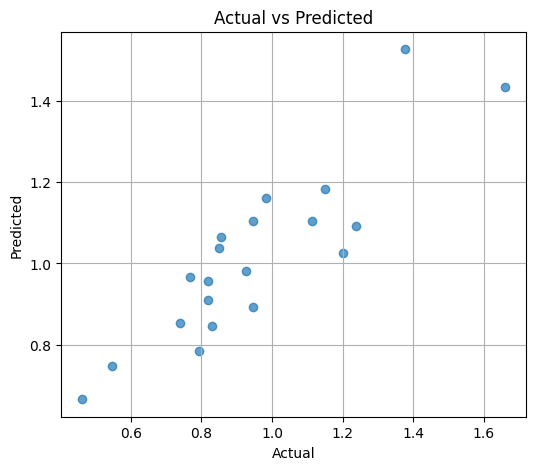

In [ ]:
# Plot Actual vs Predicted
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

**Penjelasan**

Kode diatas membuat scatter plot untuk membandingkan nilai aktual dan prediksi Solar Output, sehingga kita bisa menilai akurasi model secara visual. Titik-titik yang dekat dengan garis diagonal menunjukkan prediksi yang akurat, sementara penyebaran jauh dari garis menandakan deviasi atau kesalahan prediksi.

Grafik ini membantu memahami performa model dan pola kesalahan secara intuitif.

**Output**

Terlihat bahwa sebagian besar titik berada cukup dekat dengan garis diagonal imajiner (y = x). Hal ini menandakan bahwa model regresi linear berhasil memprediksi Solar Output (MWh) dengan cukup akurat.

Beberapa titik yang agak menyimpang menunjukkan deviasi atau kesalahan prediksi, yang wajar karena variasi harian produksi energi surya sangat dipengaruhi oleh kondisi cuaca.

Secara keseluruhan, pola plot ini memperkuat hasil evaluasi numerik sebelumnya (MAE = 0.13, RMSE = 0.15, R² = 0.71), menegaskan bahwa model cukup baik dalam menangkap tren produksi energi surya meski ada fluktuasi kecil.

### FORECASTING

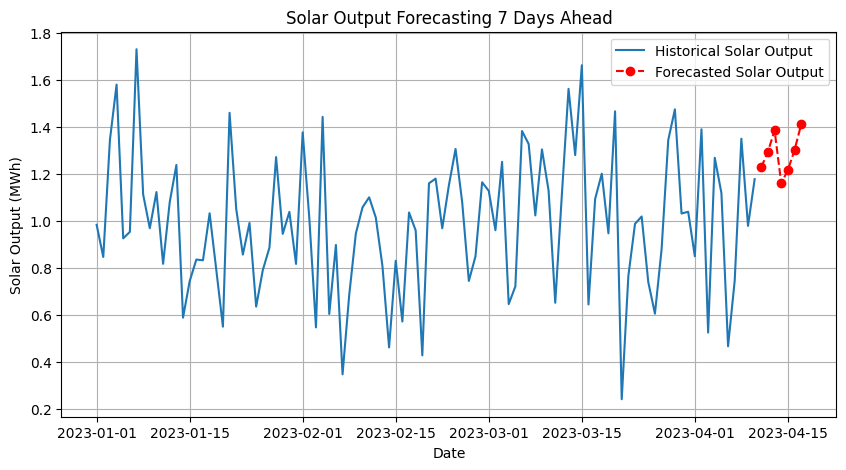

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Buat tanggal 7 hari ke depan
future_dates = pd.date_range(start=df['Date'].max() + pd.Timedelta(days=1), periods=7)

# Buat DataFrame future_data dengan perkiraan fitur
future_data = pd.DataFrame({
    'Date_year': future_dates.year,
    'Date_month': future_dates.month,
    'Date_day': future_dates.day,
    'Date_weekday': future_dates.weekday,
    'Irradiance (kWh/m²)': [6.0, 6.5, 7.0, 5.8, 6.2, 6.8, 7.1],  # perkiraan
    'Temperature (°C)': [28, 29, 27, 28, 28, 29, 30],               # perkiraan
    'Humidity (%)': [60, 55, 65, 60, 58, 57, 59]                     # perkiraan
})

# Pastikan future_data kolomnya sama dengan X_train
future_data = future_data[X_train.columns]  # urutkan kolom sesuai X_train

# Sekarang prediksi
future_data['Predicted Solar Output (MWh)'] = model.predict(future_data)


# Plot grafik forecasting
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Solar Output (MWh)'], label='Historical Solar Output')
plt.plot(future_dates, future_data['Predicted Solar Output (MWh)'], marker='o', linestyle='--', color='red', label='Forecasted Solar Output')
plt.xlabel('Date')
plt.ylabel('Solar Output (MWh)')
plt.title('Solar Output Forecasting 7 Days Ahead')
plt.legend()
plt.grid(True)
plt.show()
